In [1]:
import os
from pathlib import Path
from  keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import numpy as np

Using TensorFlow backend.


In [2]:
!python -m pip install --user pillow

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
P=Path("./pokemon_images1/")
dirs=P.glob("*")
#print(dirs)
img_data=[]
labels=[]
#optional
image_paths=[]
#converting string labels to integers
label_dict={"pikachu":0,"bulbasor":1,"charmander":2}
label2pokemon={0:"pikachu",1:"bulbasor",2:"charmander"}
for folder_dir in dirs:
    #print(folder_dir)
    label=(str(folder_dir).split("/")[-1])
    
    
    cnt=0
    print(folder_dir)
    
    #iterate over folder directories 
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        img=image.load_img(img_path,target_size=(40,40))
        img_array=image.img_to_array(img)    
        img_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
    print(cnt)
    
    

pokemon_images1/bulbasor
70
pokemon_images1/pikachu
101
pokemon_images1/charmander
58


In [4]:
import numpy as np
print(len(img_data))
print(len(labels))
print(labels)

229
229
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [5]:
X=np.array(img_data)
Y=np.array(labels)
print(X.shape)
print(Y.shape)
#X=X.resize(229,40,40,3)
X=np.array(img_data)
print(type(X))
print(X.shape)

(229, 40, 40, 3)
(229,)
<type 'numpy.ndarray'>
(229, 40, 40, 3)


In [6]:
##### visualisation
def draw_img(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    
    

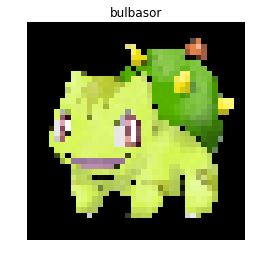

In [7]:
draw_img(X[2]/255.0,Y[2])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import backend as k
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
X=X/255.0


In [9]:
print(Y)

[2 2 1 0 1 1 0 0 0 1 0 0 2 1 1 0 1 0 0 1 0 0 0 1 2 2 2 0 1 0 2 1 1 1 0 0 2
 1 1 1 1 1 2 1 0 1 0 1 2 1 0 0 1 2 0 2 0 1 0 0 0 0 0 2 2 0 1 0 1 0 0 2 0 1
 1 0 2 1 2 0 0 2 0 2 0 2 0 0 1 2 0 1 2 0 2 0 0 0 0 2 0 1 0 2 2 0 0 2 2 0 2
 0 2 0 2 0 0 0 0 1 0 2 2 2 2 2 2 2 0 1 0 1 1 1 0 2 2 0 1 1 0 2 0 1 1 2 2 0
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 2 1 1 2 0 0 0 0 0 0 0 0 2 2 2 0 2 1 1 2
 0 1 1 0 2 0 2 1 0 1 1 2 1 1 1 0 1 0 0 1 0 2 0 1 0 0 0 1 1 1 2 2 0 2 0 1 0
 0 2 1 1 0 1 0]


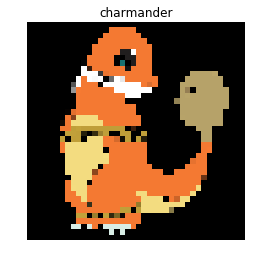

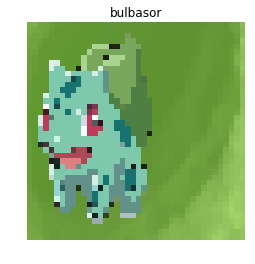

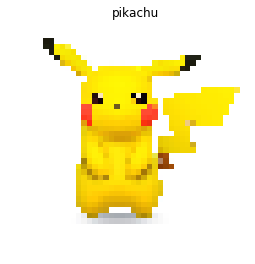

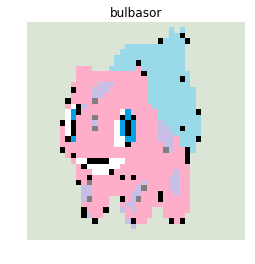

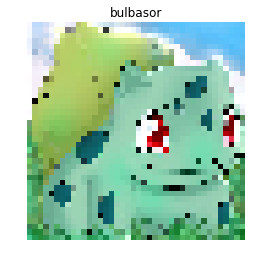

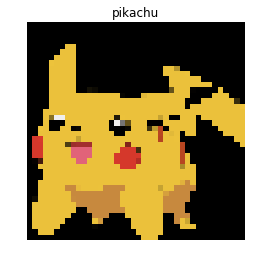

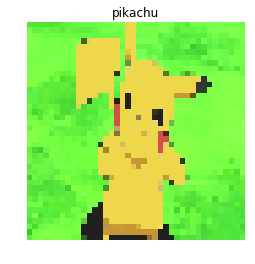

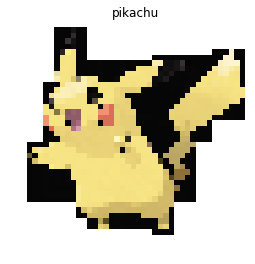

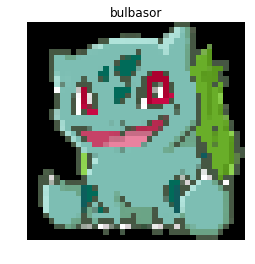

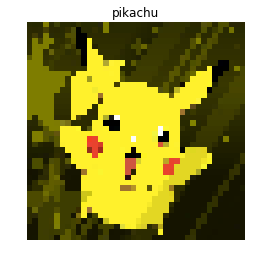

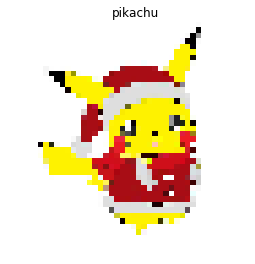

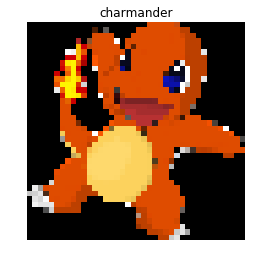

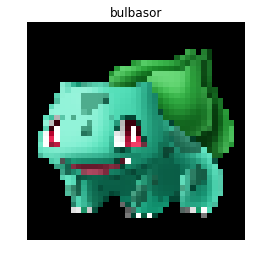

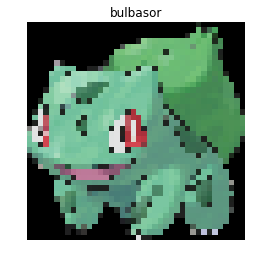

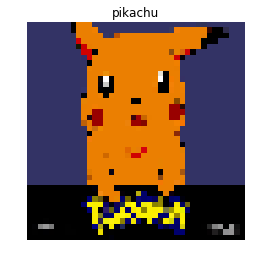

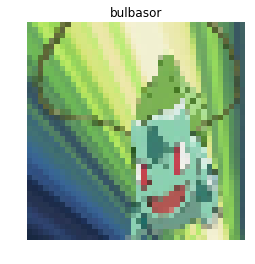

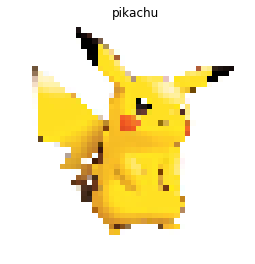

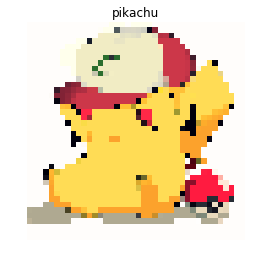

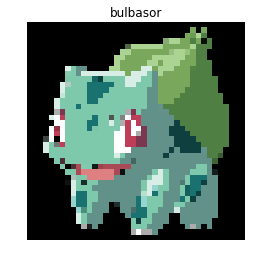

In [10]:
for i in range(1,20):
    draw_img(X[i].reshape(40,40,3),Y[i])

In [11]:
split=int(X.shape[0]*0.8)
X_=np.array(X)
Y_=np.array(Y)
X=X_[:split,:]
Y=Y_[:split]
X_test=X_[split:,:]
Y_test=Y_[split:]



In [12]:
X=X.reshape(X.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
print(X.shape)
print(X_test.shape)
print(type(Y))

(183, 4800)
(46, 4800)
<type 'numpy.ndarray'>


In [13]:
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht
Y_=one_hot(Y,3)
Y_test_=one_hot(Y_test,3)
print(Y_.shape)
print(Y_test_.shape)

(183, 3)
(46, 3)


In [14]:
def getModel():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(4800,)))
    model.add(Dense(35,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

In [15]:
model=getModel()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                307264    
_________________________________________________________________
dense_2 (Dense)              (None, 35)                2275      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 108       
Total params: 309,647
Trainable params: 309,647
Non-trainable params: 0
_________________________________________________________________


In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10,baseline=3)

In [17]:
hist=model.fit(X,Y_,epochs=15,verbose=1,validation_data=(X_test,Y_test_),batch_size=5,callbacks=[es])

Train on 183 samples, validate on 46 samples
Epoch 1/15
183/183 [==============================] - 0s 2ms/step - loss: 1.2058 - acc: 0.5027 - val_loss: 0.7367 - val_acc: 0.6304
Epoch 2/15
183/183 [==============================] - 0s 1ms/step - loss: 0.7362 - acc: 0.7158 - val_loss: 0.7343 - val_acc: 0.8478
Epoch 3/15
183/183 [==============================] - 0s 1ms/step - loss: 0.4887 - acc: 0.7923 - val_loss: 0.4346 - val_acc: 0.8913
Epoch 4/15
183/183 [==============================] - 0s 1ms/step - loss: 0.3127 - acc: 0.9071 - val_loss: 0.3829 - val_acc: 0.8478
Epoch 5/15
183/183 [==============================] - 0s 1ms/step - loss: 0.2701 - acc: 0.9344 - val_loss: 0.6280 - val_acc: 0.7826
Epoch 6/15
183/183 [==============================] - 0s 1ms/step - loss: 0.2152 - acc: 0.9399 - val_loss: 0.4309 - val_acc: 0.8261
Epoch 7/15
183/183 [==============================] - 0s 1ms/step - loss: 0.1839 - acc: 0.9508 - val_loss: 0.3644 - val_acc: 0.8261
Epoch 8/15
183/183 [===========

In [18]:
val_loss=hist.history['val_loss']
train_loss=hist.history['loss']

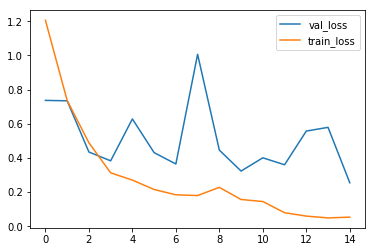

In [19]:
import matplotlib.pyplot as plt
plt.plot(val_loss,label='val_loss')
plt.plot(train_loss,label='train_loss')
plt.legend()

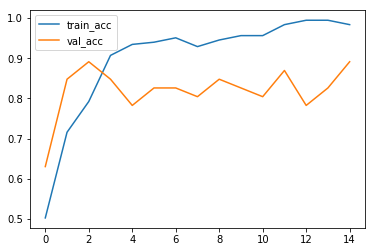

In [20]:
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
plt.plot(train_acc,label='train_acc')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
predictions=model.predict(X_test)
prediction=np.array((predictions))
labels=np.argmax(prediction,axis=-1)
print(labels)

[1 0 0 1 1 0 0 0 2 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 2 2 0 0 0
 1 0 0 2 1 1 0 1 0]
